In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ambulance_code import *

In [3]:
def report_values(file):
    df = pd.read_csv(file)
    n = df.shape[0]
    
    mean_utilization = np.mean(df['utilization'])
    mean_lost = np.mean(df['rateUnreachable'])
    mean_waiting = np.mean(df['expectedWaiting'])
    mean_jobs = np.mean(df['expectNQueue'])
    
    std_utilization = np.std(df['utilization'], ddof=1)
    std_lost = np.std(df['rateUnreachable'], ddof=1)
    std_waiting = np.std(df['expectedWaiting'], ddof=1)
    std_jobs = np.std(df['expectNQueue'], ddof=1)
    
    width_utilization = 1.96 * std_utilization / np.sqrt(n)
    width_lost = 1.96 * std_lost / np.sqrt(n)
    width_waiting = 1.96 * std_waiting / np.sqrt(n)
    width_jobs = 1.96 * std_jobs / np.sqrt(n)
    
    
    
    print("Utilization:", np.round([mean_utilization-width_utilization, mean_utilization+width_utilization], 4))
    print("Lost rate:", np.round([mean_lost-width_lost, mean_lost+width_lost], 4))
    print("Expected waiting time:", np.round([mean_waiting-width_waiting, mean_waiting+width_waiting], 4))
    print("Expected # jobs in queue:", np.round([mean_jobs-width_jobs, mean_jobs+width_jobs], 4))

In [4]:
def report_priority_values(file):
    df = pd.read_csv(file)
    n = df.shape[0]
    
    mean_lost = np.mean(df['rateUnreachableHigh'])
    mean_waiting = np.mean(df['expectWaitingHigh'])
    
    std_lost = np.std(df['rateUnreachableHigh'], ddof=1)
    std_waiting = np.std(df['expectWaitingHigh'], ddof=1)

    width_lost = 1.96 * std_lost / np.sqrt(n)
    width_waiting = 1.96 * std_waiting / np.sqrt(n)
    
    
    print("Lost rate:", np.round([mean_lost-width_lost, mean_lost+width_lost], 4))
    print("Expected waiting time:", np.round([mean_waiting-width_waiting, mean_waiting+width_waiting], 4))

## Report confidence interval

In [5]:
report_values('results/fcfs_result.csv')

Utilization: [0.8498 0.8577]
Lost rate: [0.4663 0.4889]
Expected waiting time: [ 9.3195 10.1523]
Expected # jobs in queue: [2.2825 2.5057]


In [6]:
report_values('results/fcfs_priority_result.csv')

Utilization: [0.8507 0.8589]
Lost rate: [0.4067 0.4238]
Expected waiting time: [ 9.5684 10.4443]
Expected # jobs in queue: [2.3536 2.5858]


In [7]:
report_values('results/nearest_result.csv')

Utilization: [0.8404 0.8482]
Lost rate: [0.2812 0.2932]
Expected waiting time: [7.773  8.5155]
Expected # jobs in queue: [1.8953 2.0938]


In [8]:
report_values('results/nearest_priority_result.csv')

Utilization: [0.8422 0.8503]
Lost rate: [0.2867 0.2987]
Expected waiting time: [8.2103 9.0272]
Expected # jobs in queue: [2.0083 2.2307]


In [9]:
report_values('results/get_fcfs_threshold_else_nearest_dt=2.csv')

Utilization: [0.8385 0.8457]
Lost rate: [0.3769 0.3942]
Expected waiting time: [7.8996 8.5627]
Expected # jobs in queue: [1.9222 2.0998]


In [10]:
report_values('results/get_fcfs_threshold_else_nearest_dt=3.csv')

Utilization: [0.8392 0.8453]
Lost rate: [0.2935 0.304 ]
Expected waiting time: [7.5868 8.1152]
Expected # jobs in queue: [1.851  1.9915]


In [11]:
report_values('results/get_fcfs_threshold_else_nearest_dt=4.csv')

Utilization: [0.8419 0.8488]
Lost rate: [0.2818 0.2931]
Expected waiting time: [7.5535 8.2472]
Expected # jobs in queue: [1.847  2.0324]


In [12]:
report_priority_values('results/fcfs_result.csv')

Lost rate: [0.4675 0.4915]
Expected waiting time: [ 9.3255 10.1865]


In [13]:
report_priority_values('results/fcfs_priority_result.csv')

Lost rate: [0.1586 0.1673]
Expected waiting time: [2.3202 2.4199]


In [14]:
report_priority_values('results/nearest_result.csv')

Lost rate: [0.2791 0.2929]
Expected waiting time: [7.7099 8.4976]


In [15]:
report_priority_values('results/nearest_priority_result.csv')

Lost rate: [0.149  0.1562]
Expected waiting time: [2.2822 2.367 ]


In [16]:
report_priority_values('results/get_fcfs_threshold_else_nearest_dt=2.csv')

Lost rate: [0.3768 0.394 ]
Expected waiting time: [7.8863 8.6047]


In [17]:
report_priority_values('results/get_fcfs_threshold_else_nearest_dt=3.csv')

Lost rate: [0.2916 0.3035]
Expected waiting time: [7.5883 8.1945]


In [18]:
report_priority_values('results/get_fcfs_threshold_else_nearest_dt=4.csv')

Lost rate: [0.2794 0.2925]
Expected waiting time: [7.5874 8.4326]


## Plot response time distribution

In [19]:
def plot_distribution(df_list, policy_list):
    plt.figure(figsize=(15, 9))
    
    for j in range(len(df_list)):
        df = df_list[j]
        policy_name = policy_list[j]

        df = df[df['reach_patient'] > 0]
        max_time = max(df['reach_patient'] - df['arrival_time'])

        n = df.shape[0]
        x = np.linspace(0, 20, 100)
        response_time = np.array(df['reach_patient'] - df['arrival_time'])

        y = np.zeros(len(x))
        for i in range(len(x)):
            a = response_time[response_time <= x[i]]
            y[i] = len(a) / n
    
        plt.plot(x,y, label=policy_name)
        
    plt.axvline(x=9, color='black')
    plt.legend()
    plt.ylim([0,1])
    plt.xlim([0,20])
    plt.xlabel('Response time (min)')
    
    plt.savefig('response_time_dist.png', dpi=1000)
    plt.close()

In [118]:
df = pd.read_csv('results/fcfs_df.csv')
df1 = pd.read_csv('results/fcfs_priority_df.csv')
df2 = pd.read_csv('results/nearest_df.csv')
df3 = pd.read_csv('results/nearest_priority_df.csv')
df4 = pd.read_csv('results/threshold_dt=2_df.csv')
df5 = pd.read_csv('results/threshold_dt=3_df.csv')
df6 = pd.read_csv('results/threshold_dt=4_df.csv')

df_list = [df, df1, df2, df3, df4, df5, df6]
policy_list = ['fcfs', 'fcfs priority', 'nearest', 'nearest priority', 'threshold(<=4.5)', 'threshold(<=3)', 'threshold(<=2.25)']

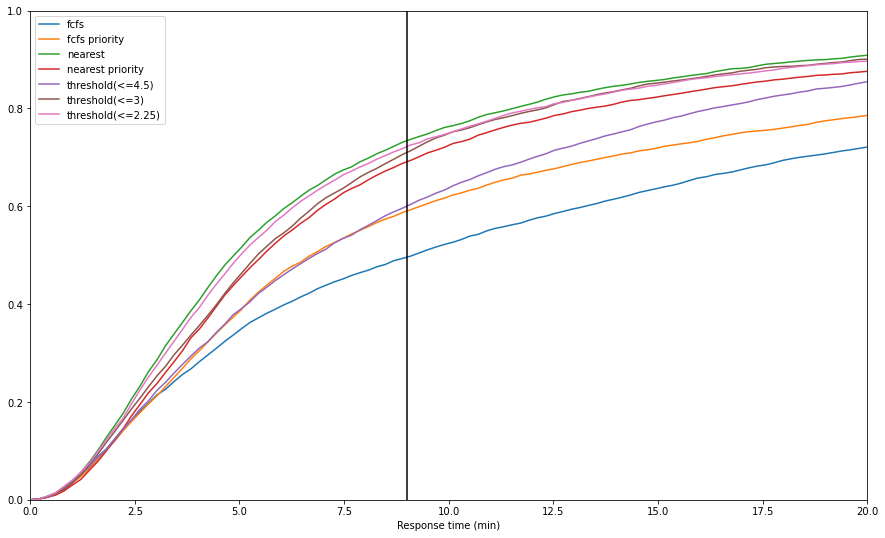

In [119]:
plot_distribution(df_list, policy_list)

In [116]:
df = df[df['priority'] > 0]
df1 = df1[df1['priority'] > 0]
df2 = df2[df2['priority'] > 0]
df3 = df3[df3['priority'] > 0]
df4 = df4[df4['priority'] > 0]
df5 = df5[df5['priority'] > 0]
df6 = df6[df6['priority'] > 0]

df_list = [df, df1, df2, df3, df4, df5, df6]
policy_list = ['fcfs', 'fcfs priority', 'nearest', 'nearest priority', 'threshold(<=4.5)', 'threshold(<=3)', 'threshold(<=2.25)']

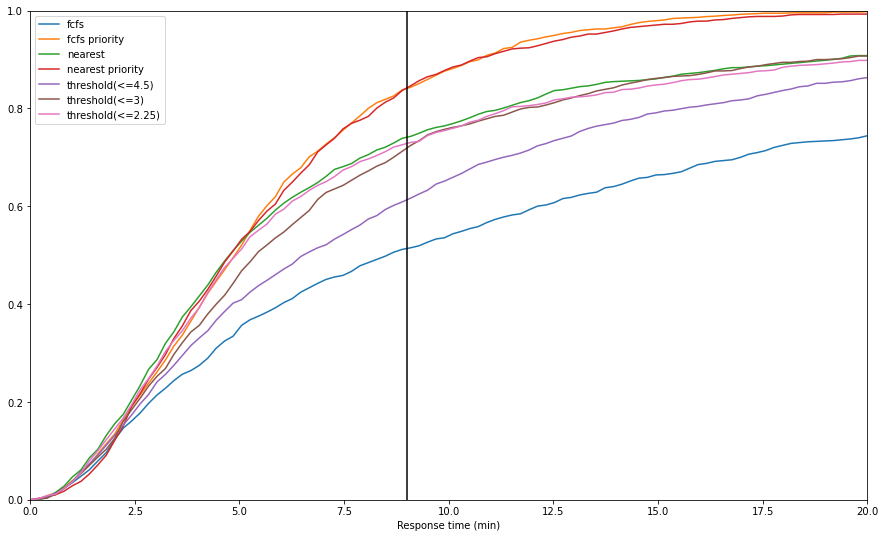

In [117]:
plot_distribution(df_list, policy_list)

## Plot adp

In [20]:
df = pd.read_csv('results/adp_result.csv')

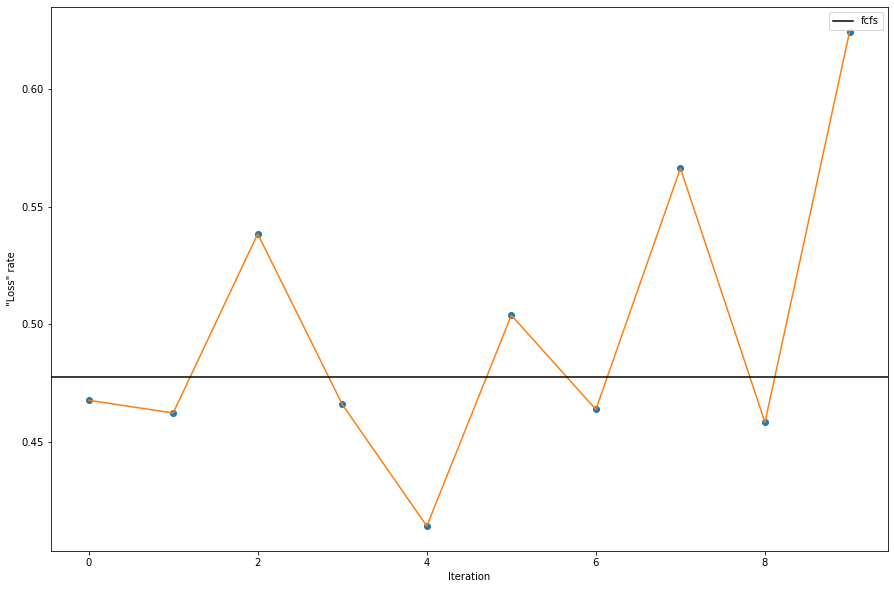

In [26]:
plt.figure(figsize=(15,10))
plt.plot(list(range(df.shape[0])), df['rateUnreachable'], 'o')
plt.plot(list(range(df.shape[0])), df['rateUnreachable'])
plt.axhline(y=0.4776, color = 'black', label = 'fcfs')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('"Loss" rate')
plt.savefig('adp.png', dpi=1000)